# Gerando um logo para a extensão de Python no Visual Studio Code

Este notebook contém as explorações iniciais realizadas para a criação de um logo para a extensão para Python do VS Code.   

Primeiramente, definimos a URL da documentação que iremos utilizar para a criação do logo.

In [2]:
import httpx
target_url = "https://code.visualstudio.com/docs/python/python-tutorial"
r = httpx.get(url=target_url)
raw_content = r.content.decode("utf-8")

## Tentativa #1

Utilizando uma expressão regular para remover tags e elements HTML das strings coletadas na página.


In [3]:

# from https://medium.com/@jorlugaqui/how-to-strip-html-tags-from-a-string-in-python-7cb81a2bbf44
def remove_tags(text):
    """Remove html tags and functions from a string"""
    import re
    clean = re.compile('(<.*?>)|\\n|\\r|\\t|\(|\)|\{|\}|\]|\[')
    return re.sub(clean, '', text)

clean_raw_content = remove_tags(raw_content)


## Tentativa #2

Utilizando BeautifulSoup extrair conteúdo da página HTML.

In [9]:
from bs4 import BeautifulSoup as bs

parsed_content = bs(r.content, features="html.parser")
clean_raw_content = "".join(parsed_content.findAll(text=True))

## Criando a nuvem de palavras 

In [5]:

from wordcloud import WordCloud, STOPWORDS
raw_words = clean_raw_content.split()

stopwords = set(STOPWORDS)

wc = WordCloud(background_color="white", max_words=2000, 
               stopwords=stopwords).generate(clean_raw_content)


## Passo 1: nuvem de palavras simples  

(-0.5, 399.5, 199.5, -0.5)

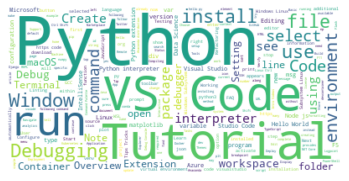

In [6]:
import matplotlib.pyplot as plt
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

## Passo 2: nuvem de palavras com formato do logo da linguage Python

(-0.5, 1023.5, 1023.5, -0.5)

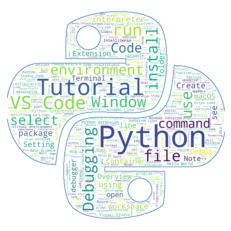

In [7]:
from PIL import Image, ImageFile
import numpy as np
python_mask = np.array(Image.open("logo_app/static/images/python-mask.png"))

wc = WordCloud(background_color="white", max_words=2000, mask=python_mask, stopwords=stopwords,  contour_width=3, contour_color='steelblue').generate(clean_raw_content)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

## Passo 3: adicionando as cores do logo Python

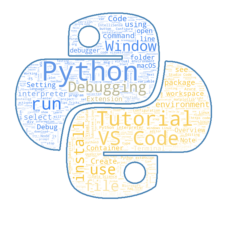

In [8]:
from wordcloud import ImageColorGenerator
python_mask = np.array(Image.open("logo_app/static/images/python-colored-mask.png"))

wc = WordCloud(background_color="white", max_words=2000, mask=python_mask, stopwords=stopwords,  contour_width=10, contour_color='steelblue').generate(clean_raw_content)
image_colors = ImageColorGenerator(python_mask)

fig, axes = plt.subplots(1,1)

axes.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis('off')
plt.show()